# Recurrent Neural Network To Predict The Pollution Level

Using multiple attributes of the dataset to make the prediction.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [30]:
dataset = pd.read_csv('pollution.csv')
dataset = dataset.dropna()
dataset = dataset.drop(['No', 'year', 'month', 'day', 'hour', 'cbwd'], axis=1)
dataset

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,129.0,-16,-4.0,1020.0,1.79,0,0
25,148.0,-15,-4.0,1020.0,2.68,0,0
26,159.0,-11,-5.0,1021.0,3.57,0,0
27,181.0,-7,-5.0,1022.0,5.36,1,0
28,138.0,-7,-5.0,1022.0,6.25,2,0
...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0
43820,10.0,-22,-3.0,1034.0,237.78,0,0
43821,10.0,-22,-3.0,1034.0,242.70,0,0
43822,8.0,-22,-4.0,1034.0,246.72,0,0


In [31]:
dataset = dataset.values

In [46]:
dataset.shape

(41757, 7)

In [27]:
normalizer = MinMaxScaler(feature_range= (0, 1))

dataset_normalized = normalizer.fit_transform(dataset)

In [32]:
x, y = [], []

for i in range(10, 41757):
    x.append(dataset_normalized[i-10:i, 1:7])
    y.append(dataset_normalized[i, 0])

x, y = np.array(x), np.array(y)

In [33]:
x[0], x.shape, y[0], y.shape

(array([[0.35294118, 0.24590164, 0.52727273, 0.00237151, 0.        ,
         0.        ],
        [0.36764706, 0.24590164, 0.52727273, 0.00394662, 0.        ,
         0.        ],
        [0.42647059, 0.2295082 , 0.54545455, 0.00552173, 0.        ,
         0.        ],
        [0.48529412, 0.2295082 , 0.56363636, 0.00868965, 0.03703704,
         0.        ],
        [0.48529412, 0.2295082 , 0.56363636, 0.01026476, 0.07407407,
         0.        ],
        [0.48529412, 0.21311475, 0.56363636, 0.01183987, 0.11111111,
         0.        ],
        [0.48529412, 0.21311475, 0.58181818, 0.01500779, 0.14814815,
         0.        ],
        [0.48529412, 0.2295082 , 0.6       , 0.0181757 , 0.        ,
         0.        ],
        [0.47058824, 0.21311475, 0.6       , 0.02134362, 0.        ,
         0.        ],
        [0.48529412, 0.2295082 , 0.61818182, 0.02451154, 0.        ,
         0.        ]]),
 (41747, 10, 6),
 0.14084507042253522,
 (41747,))

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.15)

In [40]:
model = Sequential()

model.add(LSTM(units= 100, return_sequences=True, input_shape= (x.shape[1], 6)))
model.add(Dropout(rate= 0.3))

model.add(LSTM(units= 50, return_sequences=True))
model.add(Dropout(rate= 0.3))

model.add(LSTM(units= 50, return_sequences=True))
model.add(Dropout(rate= 0.3))

model.add(LSTM(units= 50))
model.add(Dropout(rate= 0.3))

model.add(Dense(units= 1, activation= 'linear'))

model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'mean_squared_error', metrics= ['mean_absolute_error'])

c:\Users\Pedro\Documents\codigos\Deep-Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# defining callbacks
es = EarlyStopping(monitor= 'loss', patience= 10, verbose= True, min_delta= 1e-10)
rlr = ReduceLROnPlateau(monitor= 'loss', patience= 5, verbose= 1, factor= 0.2)
mcp = ModelCheckpoint(filepath= 'weights.keras', monitor= 'loss', save_best_only= True, verbose= 1)

In [43]:
model.fit(
    x_train,
    y_train,
    epochs= 100,
    batch_size= 128,
    callbacks= [es, rlr, mcp]
)

Epoch 1/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066 - mean_absolute_error: 0.0584
Epoch 1: loss improved from inf to 0.00641, saving model to weights.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0066 - mean_absolute_error: 0.0584 - learning_rate: 0.0010
Epoch 2/100
276/278 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0061 - mean_absolute_error: 0.0557
Epoch 2: loss improved from 0.00641 to 0.00603, saving model to weights.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0061 - mean_absolute_error: 0.0557 - learning_rate: 0.0010
Epoch 3/100
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0543
Epoch 3: loss improved from 0.00603 to 0.00575, saving model to weights.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0058 - mean_absolute_error: 0.0543 - learning_rate: 0.0010
Epoch 4/100
275/278 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0055 - mean_absolute_error: 0.0526
Epoch 4: loss improved from 0.00575 to 0.

In [44]:
predictions  = model.predict(x_test)

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

0.046430149027993896

In [59]:
y_test.shape

(6263, 1)

In [63]:
y_test_padded = np.hstack([y_test, np.zeros((y_test.shape[0], 6))])

In [65]:
y_test = normalizer.inverse_transform(y_test_padded)

In [66]:
y_test = y_test[:, 0]

In [67]:
y_test

array([ 94.,   7., 113., ..., 183.,  95., 143.])

In [69]:
predictions_padded = np.hstack([predictions, np.zeros((y_test.shape[0], 6))])
predictions_padded = normalizer.inverse_transform(predictions_padded)
predictions = predictions_padded[:, 0]
predictions

array([ 89.73321377,  49.87627543,  82.16357049, ..., 103.44112201,
        98.83005999, 118.29304571])

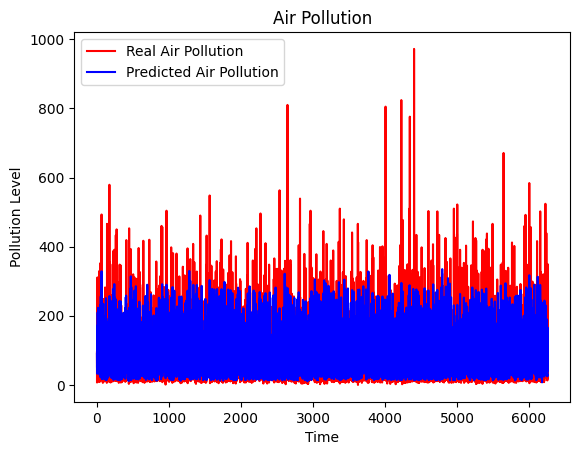

In [71]:
plt.plot(y_test, color= "red", label= "Real Air Pollution")
plt.plot(predictions, color= "blue", label= "Predicted Air Pollution")
plt.title("Air Pollution")
plt.xlabel("Time")
plt.ylabel("Pollution Level")
plt.legend()